# Logistic Regression

In [1]:
"""BreastCancerAI (c) by Roi Dvir
BreastCancerAI is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License.
You should have received a copy of the license along with this work. If not, see <http://creativecommons.org/licenses/by-nc-nd/4.0/>."""


# import libraries
import numpy as np # To do calcutaions with ndarrays
import pandas as pd # To create a confusion matrix data frame
import seaborn as sn# To create a heatmap from the confusion matrix
import matplotlib.pyplot as plt # To visualize the model and the confusion matrix
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Sklearn library for implementing Machine Learning models and processing of data
# Importing Sklearn modules for processing data
from sklearn.model_selection import train_test_split  # To split the data into train data and test data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # To scale (standardize) the data
from sklearn.metrics import confusion_matrix # To make a confusion matrix
from sklearn.utils import shuffle # To shuffle the data before the model starts to learn
from sklearn.preprocessing import LabelEncoder #Encoding categorical data values 
from sklearn.feature_selection import RFE # to select and rank features
from sklearn.model_selection import cross_val_score # to find cross validation score
from sklearn.preprocessing import binarize # in order to change threshold

In [3]:
# LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [4]:
#importing the dataset
dataset = pd.read_csv('./data/Breast_Cancer_Data_CSV.csv') 
# Making a dataset by reading the data with panda, returned as two-dimensional data structure/data frame with labeled axes
dataset.drop(['ID number'],axis=1,inplace=True)
 # Dropping the feature ID since it has nothing to do with predicting cancer (or so we believe)
dataset.head()
# Printing shape size of dataset
print("Cancer data set dimensions : {}".format(dataset.shape))
dataset.head()
# Displaying the upper part of the data frame, with the labels and numbering

Cancer data set dimensions : (569, 31)


,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [5]:
dataset.head()

,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [6]:
#features list

In [7]:
# select features

features=list(dataset.columns[[7,10,13,15,20,21,22,23,26,27]])
# features list to be used
features.append(dataset.columns[-1])
# add target values
dataset = dataset[features]

In [8]:
dataset

In [9]:
# split dataframe into two based on diagnosis
dfM=dataset[dataset['Diagnosis'] ==1]
dfB=dataset[dataset['Diagnosis'] ==0]

# shuffle dataset
dataset1 = shuffle(dataset)

X = dataset1.iloc[:, :-1].values
Y = dataset1.iloc[:, -1].values
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
#Encoding categorical data values 

# split our dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =     0.3, random_state = 0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# this function draws the confusion matrix and prints Accuracy,Sensitivity ,Specifity and notdetected 

def draw_confusion_matrix(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]
    Accuracy=round((TN+TP)/float(TN+TP+FN+FP),3)
    Misclassification=1-Accuracy
    Sensitivity=round(TP/(float(TP+FN)),3)
    Specifity=round(TN/(float(TN+cm[0,1])),3)
    not_detected=round(FN/(FN+TN),5)
    print ('Accuracy=',Accuracy,'Sensitivity=', Sensitivity, 'Specifity=' ,Specifity,' notdetected=' , not_detected)
    plt.figure(figsize = (8,5))
    sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [11]:
# this function returns an array containing the values of Accuracy,Sensitivity ,Specifity and notdetected based on the confusion matrix

def values_confusion_matrix(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]
    Accuracy=round((TN+TP)/float(TN+TP+FN+FP),3)
    Misclassification=1-Accuracy
    Sensitivity=round(TP/(float(TP+FN)),3)
    Specifity=round(TN/(float(TN+cm[0,1])),3)
    not_detected=round(FN/(FN+TN),5)
    a=np.array([Accuracy,Sensitivity,Specifity, not_detected])
    return(a)

In [12]:
# Logistic Regression model

In [13]:
def model(x):
    return 1 / (1 + np.exp(-x))

In [14]:
# this function prints cross validation score of n groups
def cross_valid_score(n):
    clf = LogisticRegression()
    scores = cross_val_score(clf, X, Y, cv=n)
    print('average=',np.average(scores),'std=', np.std(scores))

In [15]:
cross_valid_score(5)

average= 0.9508734128510966 std= 0.015088973271767541


In [16]:
def logistic_reg():
    from sklearn.linear_model import LogisticRegression
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)
    # fit the model on train data
    y_pred=logistic.predict(X_test)
    #print("score=",logistic.score(X_test, y_test) )
    #print(logistic.coef_,logistic.intercept_)

    draw_confusion_matrix(y_test,y_pred)
    return(y_pred)

In [17]:
def logistic_reg_1():
    from sklearn.linear_model import LogisticRegression
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)
    # fit the model on train data
    y_pred=logistic.predict(X_test)
    return(y_pred)

In [18]:
def logistic_reg_2(n):
    # change threshold
    from sklearn.linear_model import LogisticRegression
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)
    # fit the model on train data
    y_pred_prob_yes=logistic.predict_proba(X_test)
    y_pred=binarize(y_pred_prob_yes,n)[:,1]
    return(y_pred)

In [19]:
def rank_features(num):
    logistic = LogisticRegression()
    # create the RFE model and select num attributes
    rfe = RFE(logistic, num)
    rfe = rfe.fit(X_train,y_train)
    # summarize the selection of the attributes
    print(rfe.support_)
    print(rfe.ranking_)
    t=len(rfe.ranking_)
    for i in range (t-1):
        if (rfe.ranking_[i]==1):
            print (features[i])

Accuracy= 0.965 Sensitivity= 0.952 Specifity= 0.972  notdetected= 0.02778


array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

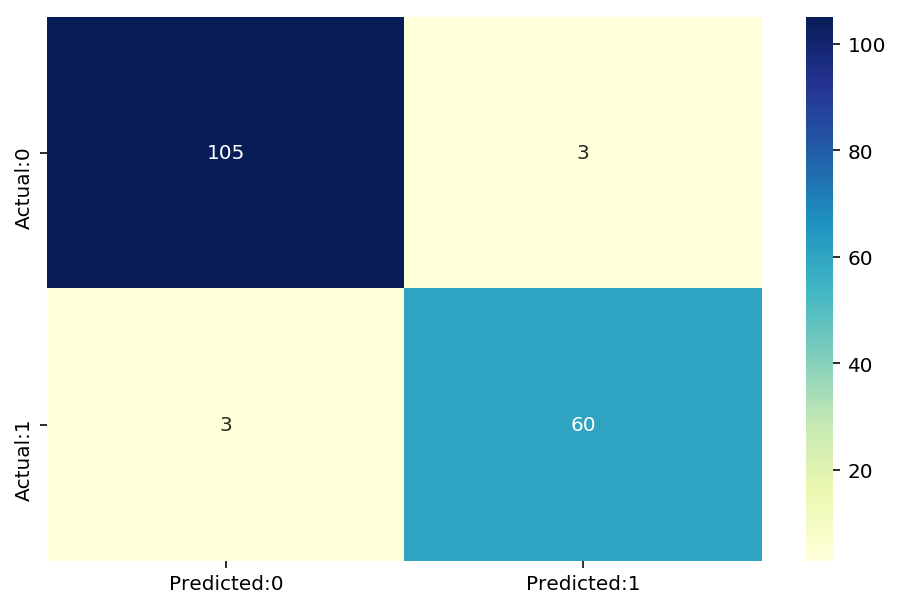

In [20]:
logistic_reg()

In [21]:
rank_features(5)

[False False  True False  True  True False  True False  True]
[4 2 1 6 1 1 3 1 5 1]
area.std
radius.w
texture.w
area.w


In [22]:
para=np.zeros([1000,4])
i=0
for i in range (1000):
    dataset1 = shuffle(dataset)
    X = dataset1.iloc[:, :-1].values
    Y = dataset1.iloc[:, -1].values
    labelencoder_Y = LabelEncoder()
    Y = labelencoder_Y.fit_transform(Y)
    #Encoding categorical data values 
    # split our dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =     0.3,     random_state = 0)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    y_pred=logistic_reg_1()
    a=values_confusion_matrix(y_test,y_pred)
    para[i,:]=a
    i=i+1

print(np.average(para, axis=0))
print(np.std(para, axis=0))

[0.971712   0.947225   0.986226   0.03072488]
[0.01054472 0.02673975 0.01120165 0.0154327 ]


In [23]:
#changing threshold to 0.3
para=np.zeros([1000,4])
i=0
for i in range (1000):
    dataset1 = shuffle(dataset)
    X = dataset1.iloc[:, :-1].values
    Y = dataset1.iloc[:, -1].values
    labelencoder_Y = LabelEncoder()
    Y = labelencoder_Y.fit_transform(Y)
    #Encoding categorical data values 
    # split our dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =     0.3,     random_state = 0)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    y_pred=logistic_reg_2(0.3)

    # option to change threshold
    #y_pred=logistic_reg_2()

    a=values_confusion_matrix(y_test,y_pred)
    para[i,:]=a
    i=i+1

print(np.average(para, axis=0))
print(np.std(para, axis=0))

[0.964233 0.971529 0.960071 0.017266]
[0.01252033 0.02010376 0.01915912 0.01227291]
